<a href="https://colab.research.google.com/github/K-Domar/MyRepo/blob/main/Diamond_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Dense
from keras.models import Sequential

**Describe colums in dataset**

*price* - price in US dollars (\$326--\$18,823)

*carat* - weight of the diamond (0.2--5.01)

*cut* - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

*color* - diamond colour, from J (worst) to D (best)

*clarity* -  a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

*x* - length in mm (0--10.74)

*y* - width in mm (0--58.9)

*z* - depth in mm (0--31.8)

*depth* - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

*table* - width of top of diamond relative to widest point (43--95)

In [87]:
diamond = pd.read_csv('https://raw.githubusercontent.com/K-Domar/MyRepo/main/diamonds.csv')
diamond = diamond.loc[:,~diamond.columns.str.match("Unnamed")]
diamond.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [88]:
#Describe csv file
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [89]:
# check types of data in columns
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [90]:
# Looking for missing data

# Convert '?' to NaN
diamond[diamond==0] = np.nan

# Print the number of NaNs
print(diamond.isnull().sum())

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64


In [91]:
# Drop the rows with missing values from diamond.csv
diamond = diamond.dropna()
diamond.shape

(53920, 10)

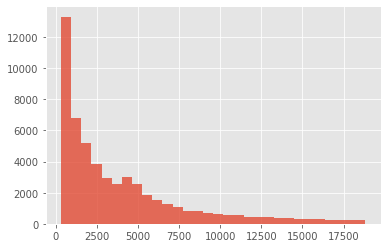

In [92]:
# Determine a problem type
diamond.price.hist(bins=30, alpha=0.8)
plt.show()


In [ ]:
C_mat = diamond.corr()
fig = plt.figure(figsize = (5,5))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

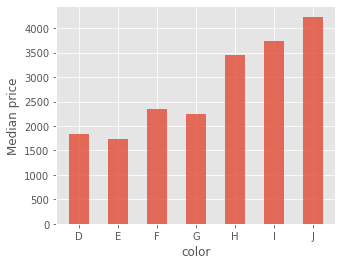

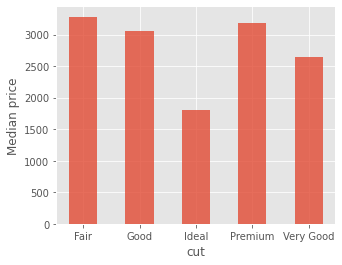

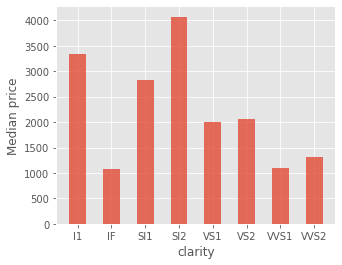

In [94]:
plt.style.use('ggplot')
# EDA for categorical features 
names = ['color', 'cut', 'clarity']

for i in range(0,3):
  
  parameters = diamond.groupby(names[i], as_index=False)['price'].median()
  fig = plt.figure(figsize=(5, 4))
  plt.bar(parameters[names[i]], parameters.price, width=0.5, alpha=0.8)
  plt.xlabel(names[i])
  i += 1
  plt.ylabel('Median price')
plt.show()


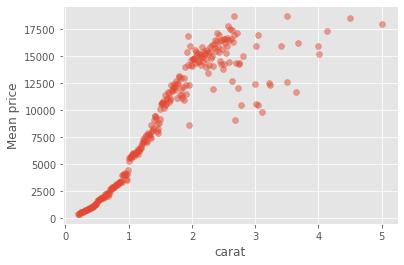

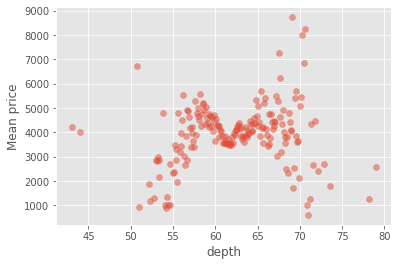

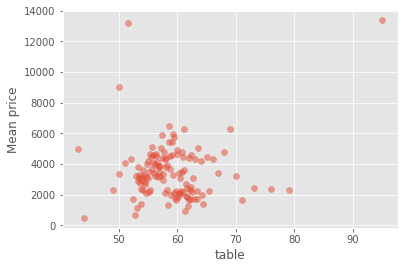

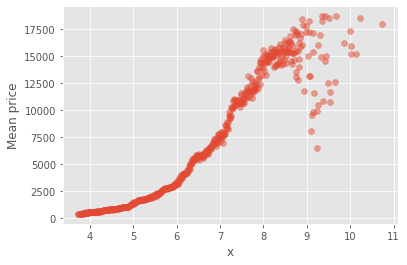

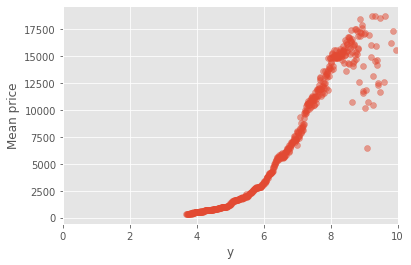

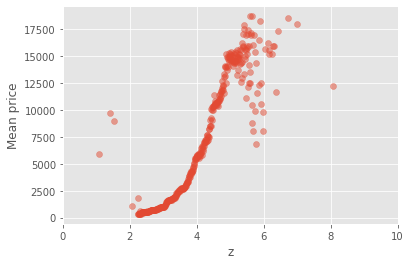

In [96]:
# EDA for numerical features

name = ['carat', 'depth', 'table', 'x', 'y', 'z']

for i in range(0,6):
  num_parameters = diamond.groupby(name[i], as_index=False)['price'].mean()
  plt.scatter(x=num_parameters[name[i]], y=num_parameters['price'], alpha=0.5)

  plt.xlabel(name[i])
  plt.ylabel('Mean price')
  if i > 3:
    plt.xlim(0, 10)
  plt.show()

In [97]:
#Feature Engineering

#One_Hot encoding

ohe_cut = pd.get_dummies(diamond['cut'], prefix='cut')
ohe_color = pd.get_dummies(diamond['color'], prefix='color')
ohe_clarity = pd.get_dummies(diamond['clarity'], prefix='clarity')

diamond = pd.concat([diamond, ohe_cut], axis=1)
diamond = pd.concat([diamond, ohe_color], axis=1)
diamond = pd.concat([diamond, ohe_clarity], axis=1)

#drop colums with type 'object'
diamond = diamond.select_dtypes(exclude=['object'])
diamond.shape

(53920, 27)

In [98]:
X = diamond.drop('price', axis=1)
y = diamond['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

SIMPLE REGRESSION MODEL

In [99]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_predicted = rf.predict(X_test)
rmse_rf = np.sqrt(MSE(y_test, y_predicted))
print("Root Mean Squared Error: {}".format(rmse_rf))
print("Score train = ",rf.score(X_train, y_train))
print("Score test  = ",rf.score(X_test, y_test))

Root Mean Squared Error: 563.8870778995797
Score train =  0.9973479013243906
Score test  =  0.9798510602677621


In [100]:
# Linear Regression

lr = LinearRegression(normalize=True)

lr.fit(X_train, y_train)
y_predicted = lr.predict(X_test)
rmse_lr = np.sqrt(MSE(y_test, y_predicted))
print("Root Mean Squared Error: {}".format(rmse_lr))
print("Score train = ",lr.score(X_train, y_train))
print("Score test  = ",lr.score(X_test, y_test))

Root Mean Squared Error: 1213.5599839399774
Score train =  0.9220039047707651
Score test  =  0.9066766310759761


In [101]:
#Lasso

lasso = Lasso(normalize=True)

lasso.fit(X_train, y_train)
y_predicted = lasso.predict(X_test)
rmse_lasso = np.sqrt(MSE(y_test, y_predicted))
print("Root Mean Squared Error: {}".format(rmse_lasso))
print("Score train = ",lasso.score(X_train, y_train))
print("Score test  = ",lasso.score(X_test, y_test))

Root Mean Squared Error: 1415.97821194749
Score train =  0.8767455830002281
Score test  =  0.8729481320011437


A NEURAL NETWORK

In [102]:
# Building a model

model = Sequential()
model.add(Dense(26, activation='relu', input_shape=(26,)))
model.add(Dense(26, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_7 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 27        
Total params: 1,431
Trainable params: 1,431
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Trainig model

model.fit(X_train, y_train,
          batch_size=100,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/50
432/432 [==============================] - 1s 2ms/step - loss: 28263408.5497 - val_loss: 15113684.0000
Epoch 2/50
432/432 [==============================] - 1s 1ms/step - loss: 15202797.1709 - val_loss: 14748362.0000
Epoch 3/50
432/432 [==============================] - 1s 1ms/step - loss: 14843896.9030 - val_loss: 14286704.0000
Epoch 4/50
432/432 [==============================] - 1s 1ms/step - loss: 14299407.2079 - val_loss: 13565218.0000
Epoch 5/50
432/432 [==============================] - 1s 1ms/step - loss: 13200151.8868 - val_loss: 12135322.0000
Epoch 6/50
432/432 [==============================] - 1s 1ms/step - loss: 11811040.1617 - val_loss: 9088724.0000
Epoch 7/50
432/432 [==============================] - 1s 1ms/step - loss: 8411137.5912 - val_loss: 5296362.5000
Epoch 8/50
432/432 [==============================] - 1s 1ms/step - loss: 4834214.5889 - val_loss: 3430561.5000
Epoch 9/50
432/432 [==============================] - 1s 1ms/step - loss: 3194337.3666 - val_

In [104]:
# evaluate loaded model
scores_train = model.evaluate(X_train, y_train, verbose=0)
scores_test  = model.evaluate(X_test,  y_test,  verbose=0)

print("Final loss value:",scores_train)
y_model = model.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_model))
print("Root Mean Squared Error: {}".format(rmse))

Final loss value: 581260.0625
Root Mean Squared Error: 822.2774016075721
